# Import Modules

In [1]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
domestic_visitors = pd.read_csv('domestic_visitors.csv')
foreign_visitors = pd.read_csv('foreign_visitors.csv')

In [3]:
domestic_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 59.2+ KB


In [4]:
foreign_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 59.2+ KB


**Q1. List down the top 10 districts that have the highest number of domestic visitors overall (2016-2019)? (Insight: Get an overview of districts that are doing well)**

In [5]:
domestic_district_visitors = domestic_visitors.groupby('district')['visitors'].sum().reset_index()
top_10_districts = domestic_district_visitors.sort_values(by = 'visitors', ascending = False).head(10)

domestic_district_visitors

,district,visitors
0,Adilabad,7321575
1,Bhadradri Kothagudem,21600962
2,Hyderabad,83900960
3,Jagtial,11303514
4,Jangaon,826280
5,Jayashankar Bhoopalpally,19632865
6,Jogulamba Gadwal,6813340
7,Kamareddy,1773
8,Karimnagar,9462383
9,Khammam,9378315


In [6]:
top_10_districts

,district,visitors
2,Hyderabad,83900960
23,Rajanna Sircilla,41763276
31,Warangal (Urban),30726603
32,Yadadri Bhongir,26893080
1,Bhadradri Kothagudem,21600962
14,Medak,20542639
5,Jayashankar Bhoopalpally,19632865
12,Mahbubnagar,17180118
20,Nirmal,13315796
3,Jagtial,11303514


C:\Users\trush\AppData\Local\Temp\ipykernel_4260\3461367107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_districts, x = 'visitors', y = 'district', palette = 'viridis')


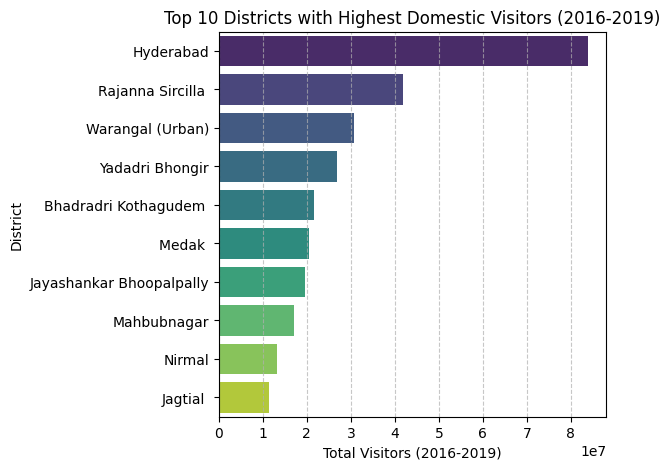

In [7]:
# plot graph of top 10 disricts

plt.figure(figsize=(5,5))
sns.barplot(data = top_10_districts, x = 'visitors', y = 'district', palette = 'viridis')

plt.xlabel('Total Visitors (2016-2019)')
plt.ylabel('District')
plt.title("Top 10 Districts with Highest Domestic Visitors (2016-2019)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Q2. List down top 3 districts based on compounded anuual growth rate (CAGR) of visitors between (2016 - 2019) ? (Districts that are growing)
use of CAGR formula.**

In [8]:
domestic_district_2016  = domestic_visitors[domestic_visitors['year'] == 2016].groupby('district')['visitors'].sum().reset_index()
domestic_district_2019 = domestic_visitors[domestic_visitors['year'] == 2019].groupby('district')['visitors'].sum().reset_index()

foreign_district_2016 = foreign_visitors[foreign_visitors['year'] == 2016].groupby('district')['visitors'].sum().reset_index()
foreign_district_2019 = foreign_visitors[foreign_visitors['year'] == 2019].groupby('district')['visitors'].sum().reset_index()

# combine domestic and foreign visitors of year 2016  
domestic_foreign_2016 = domestic_district_2016 + foreign_district_2016
# clean the district names
domestic_foreign_2016['district'] = domestic_district_2016['district']

# combine domestic and foreign visitors of year 2016  
domestic_foreign_2019 = domestic_district_2019 + foreign_district_2019
# clean the district names
domestic_foreign_2019['district'] = domestic_district_2019['district']

domestic_foreign_df = pd.merge(domestic_foreign_2016,domestic_foreign_2019, on = 'district')
domestic_foreign_df = domestic_foreign_df.rename(columns={"visitors_x": "visitors_2016", "visitors_y": "visitors_2019"})

domestic_foreign_df

,district,visitors_2016,visitors_2019
0,Adilabad,5075567,775901
1,Bhadradri Kothagudem,889030,12817737
2,Hyderabad,23558336,14121662
3,Jagtial,623077,3086115
4,Jangaon,40662,328890
5,Jayashankar Bhoopalpally,243486,662575
6,Jogulamba Gadwal,523446,2008290
7,Kamareddy,127,534
8,Karimnagar,9167468,77491
9,Khammam,5005031,1413440


In [9]:
# calculate cagr
domestic_foreign_df['CAGR'] = ((domestic_foreign_df['visitors_2019'] / domestic_foreign_df['visitors_2016']) ** (1/3)) - 1

# remove nan and inf values
domestic_foreign_df.replace(np.inf, np.nan, inplace = True)
domestic_foreign_df = domestic_foreign_df.dropna()

In [10]:
# sort them in increasing order
top_3_districts = domestic_foreign_df.sort_values(by='CAGR', ascending= False).head(3)
top_3_districts

,district,visitors_2016,visitors_2019,CAGR
13,Mancherial,7802,269820,2.258037
28,Warangal (Rural),19400,353500,1.631455
1,Bhadradri Kothagudem,889030,12817737,1.433875


C:\Users\trush\AppData\Local\Temp\ipykernel_4260\2959880542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_3_districts, x = 'CAGR', y = 'district', palette = 'viridis')


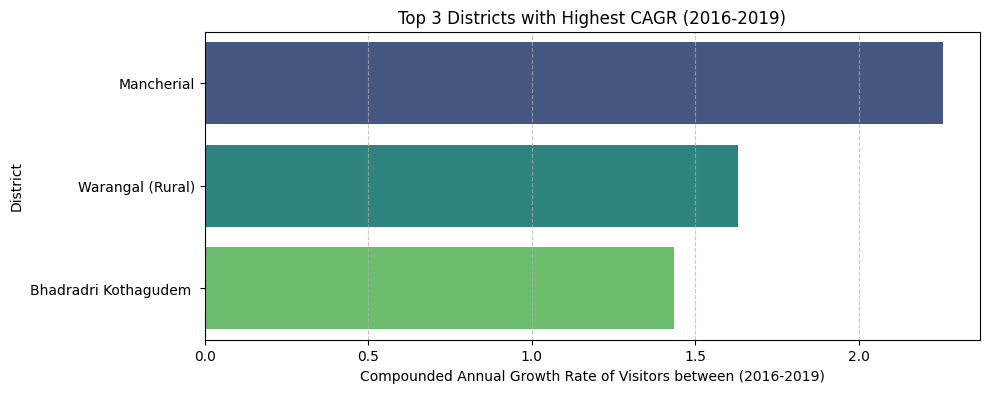

In [11]:
# plot graph of top 3 disricts

plt.figure(figsize=(10,4))
sns.barplot(data = top_3_districts, x = 'CAGR', y = 'district', palette = 'viridis')

plt.xlabel('Compounded Annual Growth Rate of Visitors between (2016-2019)')
plt.ylabel('District')
plt.title("Top 3 Districts with Highest CAGR (2016-2019)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Q3. What are  the peak and low season months for hyderabad based on the data from 2016 to 2019 for hyderabad district ?
(Insights: Goverment can plan well for the peak seasons and boost low seasons by introducting new events)**

In [12]:
hyderabad_domestic = domestic_visitors[domestic_visitors['district'] == 'Hyderabad']
hyderabad_domestic.head()

,district,date,month,year,visitors
24,Hyderabad,01-01-2016,January,2016,1122510
25,Hyderabad,01-02-2016,February,2016,778748
26,Hyderabad,01-03-2016,March,2016,1017794
27,Hyderabad,01-04-2016,April,2016,1127738
28,Hyderabad,01-05-2016,May,2016,1287181


In [13]:
hyderabad_foregin =  foreign_visitors[foreign_visitors['district'] == 'Hyderabad']
hyderabad_foregin

,district,date,month,year,visitors
24,Hyderabad,01-01-2016,January,2016,15865
25,Hyderabad,01-02-2016,February,2016,29646
26,Hyderabad,01-03-2016,March,2016,13019
27,Hyderabad,01-04-2016,April,2016,8402
28,Hyderabad,01-05-2016,May,2016,8522
29,Hyderabad,01-06-2016,June,2016,10284
30,Hyderabad,01-07-2016,July,2016,17142
31,Hyderabad,01-08-2016,August,2016,12842
32,Hyderabad,01-09-2016,September,2016,9397
33,Hyderabad,01-10-2016,October,2016,12808


In [14]:
# merge the domestic and foreign dataset
hyderabad_visitors_df = pd.merge(hyderabad_domestic, hyderabad_foregin, on = ['month', 'year','date','district'], how = 'inner')
# rename columns of domestic and foreign visitors
hyderabad_visitors_df = hyderabad_visitors_df.rename(columns={'visitors_x':'domestic_visitors','visitors_y':'foreign_visitors'})
# calculate total visitors
hyderabad_visitors_df['total_visitors'] = hyderabad_visitors_df.domestic_visitors + hyderabad_visitors_df.foreign_visitors
hyderabad_visitors_df

,district,date,month,year,domestic_visitors,foreign_visitors,total_visitors
0,Hyderabad,01-01-2016,January,2016,1122510,15865,1138375
1,Hyderabad,01-02-2016,February,2016,778748,29646,808394
2,Hyderabad,01-03-2016,March,2016,1017794,13019,1030813
3,Hyderabad,01-04-2016,April,2016,1127738,8402,1136140
4,Hyderabad,01-05-2016,May,2016,1287181,8522,1295703
5,Hyderabad,01-06-2016,June,2016,12032661,10284,12042945
6,Hyderabad,01-07-2016,July,2016,1096754,17142,1113896
7,Hyderabad,01-08-2016,August,2016,1061137,12842,1073979
8,Hyderabad,01-09-2016,September,2016,832987,9397,842384
9,Hyderabad,01-10-2016,October,2016,901960,12808,914768


In [15]:
# groupby seasonal months and find out total visitors in each month
Seasonal_months = hyderabad_visitors_df.groupby(['month'])['total_visitors'].sum().reset_index()
Seasonal_months.sort_values(by='total_visitors', ascending=False)

,month,total_visitors
6,June,16965307
2,December,9458632
10,October,6650351
4,January,6558551
0,April,6187334
8,May,6109590
1,August,5834736
9,November,5719659
5,July,5633143
11,September,5406363


In [16]:
peak_seasonal_months = Seasonal_months.sort_values(by='total_visitors', ascending=False).head(3)
low_seasonal_months = Seasonal_months.sort_values(by='total_visitors', ascending=True).head(3)
print('Peak Seasonal Months:')
peak_seasonal_months

Peak Seasonal Months:


,month,total_visitors
6,June,16965307
2,December,9458632
10,October,6650351


In [17]:
print('Low Seasonal Months:')
low_seasonal_months

Low Seasonal Months:


,month,total_visitors
3,February,5118208
7,March,5303984
11,September,5406363


**Q4. Show the top & bottom 3 districts with highest domestic to foreign tourist ratio ?
(Insight: Goverment can learn from top districts and replicate the same to bottom districts which can improve the foreign visitors as foreign visitors will bring more revenue)**

In [18]:
# combine the dataset of both domestic and foreign
visitors_df = pd.merge(domestic_visitors, foreign_visitors, on = ['month', 'date','year','district'])

# rename their columns names
visitors_df = visitors_df.rename(columns={'visitors_x':'domestic_visitors', 'visitors_y':'foreign_visitors'})

# groupby district and sum their visitors from 2016 - 2019
domestic_to_foreign_ratio = visitors_df.groupby('district')[['domestic_visitors','foreign_visitors']].sum().reset_index()

domestic_to_foreign_ratio

,district,domestic_visitors,foreign_visitors
0,Adilabad,7321575,32
1,Bhadradri Kothagudem,21600962,0
2,Hyderabad,83900960,1044898
3,Jagtial,11303514,0
4,Jangaon,826280,2
5,Jayashankar Bhoopalpally,19632865,1252
6,Jogulamba Gadwal,6813340,945
7,Kamareddy,1773,0
8,Karimnagar,9462383,0
9,Khammam,9378315,0


In [19]:
# add domestic and foreign ratio columns
domestic_to_foreign_ratio['domestic_ratio'] = round((domestic_to_foreign_ratio.domestic_visitors / (domestic_to_foreign_ratio.domestic_visitors + domestic_to_foreign_ratio.foreign_visitors))*100 ,2)

domestic_to_foreign_ratio['foreign_ratio'] = round((domestic_to_foreign_ratio.foreign_visitors / (domestic_to_foreign_ratio.domestic_visitors + domestic_to_foreign_ratio.foreign_visitors))*100 ,2)

domestic_to_foreign_ratio

,district,domestic_visitors,foreign_visitors,domestic_ratio,foreign_ratio
0,Adilabad,7321575,32,100.00,0.00
1,Bhadradri Kothagudem,21600962,0,100.00,0.00
2,Hyderabad,83900960,1044898,98.77,1.23
3,Jagtial,11303514,0,100.00,0.00
4,Jangaon,826280,2,100.00,0.00
5,Jayashankar Bhoopalpally,19632865,1252,99.99,0.01
6,Jogulamba Gadwal,6813340,945,99.99,0.01
7,Kamareddy,1773,0,100.00,0.00
8,Karimnagar,9462383,0,100.00,0.00
9,Khammam,9378315,0,100.00,0.00


In [20]:
# clean the data

# add nan to inf values to remove them using dropna()
domestic_to_foreign_ratio = domestic_to_foreign_ratio.replace(np.inf,np.nan)
domestic_to_foreign_ratio = domestic_to_foreign_ratio.dropna()

# sort by highest ratio
domestic_to_foreign_ratio.sort_values(by = ['domestic_ratio','foreign_ratio'], ascending=False)

,district,domestic_visitors,foreign_visitors,domestic_ratio,foreign_ratio
0,Adilabad,7321575,32,100.00,0.00
1,Bhadradri Kothagudem,21600962,0,100.00,0.00
3,Jagtial,11303514,0,100.00,0.00
4,Jangaon,826280,2,100.00,0.00
7,Kamareddy,1773,0,100.00,0.00
8,Karimnagar,9462383,0,100.00,0.00
9,Khammam,9378315,0,100.00,0.00
10,Komaram Bheem Asifabad,92734,0,100.00,0.00
11,Mahabubabad,600697,0,100.00,0.00
13,Mancherial,867242,10,100.00,0.00


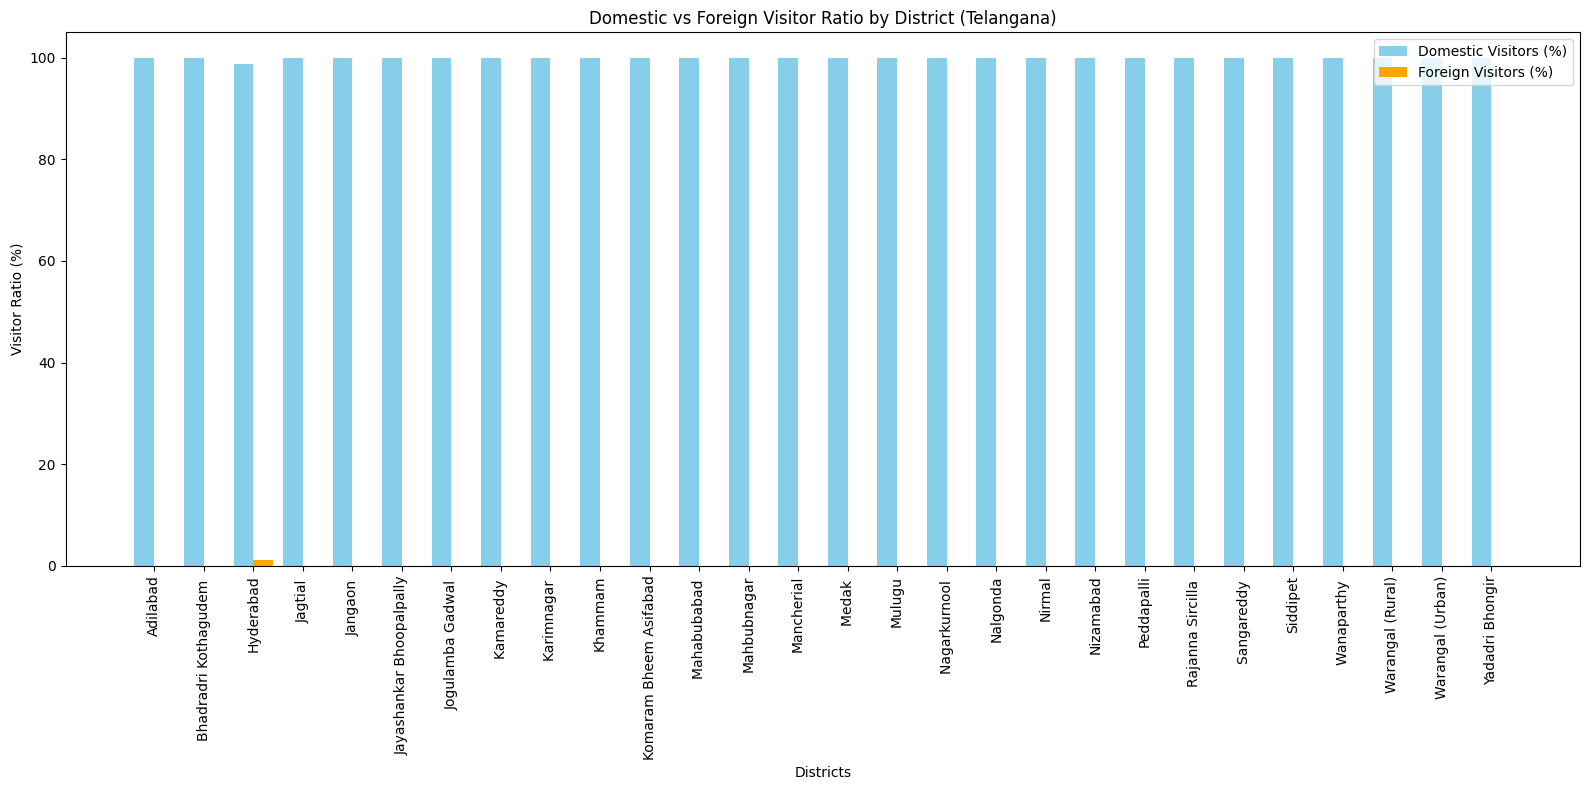

In [21]:

# Set figure size
plt.figure(figsize=(16, 8))

# Set bar positions and width
bar_width = 0.4
x = np.arange(len(domestic_to_foreign_ratio.district))

# Plot domestic and foreign visitor ratios
plt.bar(x - bar_width/2, domestic_to_foreign_ratio.domestic_ratio, width=bar_width, label='Domestic Visitors (%)', color='skyblue')
plt.bar(x + bar_width/2, domestic_to_foreign_ratio.foreign_ratio, width=bar_width, label='Foreign Visitors (%)', color='orange')

# Labels and titles
plt.xlabel('Districts')
plt.ylabel('Visitor Ratio (%)')
plt.title('Domestic vs Foreign Visitor Ratio by District (Telangana)')
plt.xticks(x, domestic_to_foreign_ratio.district, rotation=90)
plt.legend()

# Display the bar chart
plt.tight_layout()
plt.show()

**Q5. List the top & bottom 5 districts based on 'population to tourist footfall ratio' ratio in 2019?
(ratio: Total Visitors / Total Residents Population in the given year)
(Insight: Find the bottom districts and create a plan to accomodate more tourist)
ratio = Total Tourist / Total population**

In [22]:
population_to_tourist_df = pd.merge(domestic_district_2019, foreign_district_2019, on = 'district')
population_to_tourist_df = population_to_tourist_df.rename(columns = {'visitors_x':'domestic_visitors', 'visitors_y':'foreign_visitors'})
population_to_tourist_df['total_visitors'] = population_to_tourist_df.domestic_visitors + population_to_tourist_df.foreign_visitors
population_to_tourist_df

,district,domestic_visitors,foreign_visitors,total_visitors
0,Adilabad,775895,6,775901
1,Bhadradri Kothagudem,12817737,0,12817737
2,Hyderabad,13802362,319300,14121662
3,Jagtial,3086115,0,3086115
4,Jangaon,328890,0,328890
5,Jayashankar Bhoopalpally,662530,45,662575
6,Jogulamba Gadwal,2007995,295,2008290
7,Kamareddy,534,0,534
8,Karimnagar,77491,0,77491
9,Khammam,1413440,0,1413440


In [23]:
demographic_df = pd.read_csv('Demographics.csv')
demographic_df

,Districts,Males,Females,Sex Ratio (Females per 1000 Males),Rural,Urban,Rural Population (%),Urban Population (%),Households
0,ADILABAD,356407,352565,989,541226,167746,76.34,23.66,156683
1,BHADRADRI,532390,536871,1008,730178,339083,68.29,31.71,279190
2,HYDERABAD,2018575,1924748,954,0,3943323,0.00,100.00,849051
3,JAGTIAL,484079,501338,1036,764081,221336,77.54,22.46,253619
4,JANGAON,283648,282728,997,495019,71357,87.40,12.60,139238
5,JAYASHANKAR,354203,357231,1009,657554,53880,92.43,7.57,189622
6,JOGULAMBA,309274,300716,972,546813,63177,89.64,10.36,132261
7,KAMAREDDY,478389,494236,1033,849003,123622,87.29,12.71,222513
8,KARIMNAGAR,504620,501091,993,696727,308984,69.28,30.72,258485
9,KHAMMAM,699124,702515,1005,1084811,316828,77.40,22.60,382929


In [24]:
# convert uppercase into senctence case  and compare the names of the districts
demographic_df['Districts']  = [i.capitalize() for i in demographic_df.Districts]
demographic_df

,Districts,Males,Females,Sex Ratio (Females per 1000 Males),Rural,Urban,Rural Population (%),Urban Population (%),Households
0,Adilabad,356407,352565,989,541226,167746,76.34,23.66,156683
1,Bhadradri,532390,536871,1008,730178,339083,68.29,31.71,279190
2,Hyderabad,2018575,1924748,954,0,3943323,0.00,100.00,849051
3,Jagtial,484079,501338,1036,764081,221336,77.54,22.46,253619
4,Jangaon,283648,282728,997,495019,71357,87.40,12.60,139238
5,Jayashankar,354203,357231,1009,657554,53880,92.43,7.57,189622
6,Jogulamba,309274,300716,972,546813,63177,89.64,10.36,132261
7,Kamareddy,478389,494236,1033,849003,123622,87.29,12.71,222513
8,Karimnagar,504620,501091,993,696727,308984,69.28,30.72,258485
9,Khammam,699124,702515,1005,1084811,316828,77.40,22.60,382929


In [25]:
# add the additional state
demographic_df.loc[len(demographic_df)] = {'Districts':'Mulugu','Males':0,'Females':0,'Sex Ratio (Females per 1000 Males)':0,\
                       'Rural':0,'Urban':0,'Rural Population (%)':0,'Urban Population (%)':0,'Households':0}
demographic_df

,Districts,Males,Females,Sex Ratio (Females per 1000 Males),Rural,Urban,Rural Population (%),Urban Population (%),Households
0,Adilabad,356407,352565,989,541226,167746,76.34,23.66,156683
1,Bhadradri,532390,536871,1008,730178,339083,68.29,31.71,279190
2,Hyderabad,2018575,1924748,954,0,3943323,0.00,100.00,849051
3,Jagtial,484079,501338,1036,764081,221336,77.54,22.46,253619
4,Jangaon,283648,282728,997,495019,71357,87.40,12.60,139238
5,Jayashankar,354203,357231,1009,657554,53880,92.43,7.57,189622
6,Jogulamba,309274,300716,972,546813,63177,89.64,10.36,132261
7,Kamareddy,478389,494236,1033,849003,123622,87.29,12.71,222513
8,Karimnagar,504620,501091,993,696727,308984,69.28,30.72,258485
9,Khammam,699124,702515,1005,1084811,316828,77.40,22.60,382929


In [26]:
demographic_df = demographic_df.sort_values(by = 'Districts', ignore_index=True)


In [27]:
demographic_df

,Districts,Males,Females,Sex Ratio (Females per 1000 Males),Rural,Urban,Rural Population (%),Urban Population (%),Households
0,Adilabad,356407,352565,989,541226,167746,76.34,23.66,156683
1,Bhadradri,532390,536871,1008,730178,339083,68.29,31.71,279190
2,Hyderabad,2018575,1924748,954,0,3943323,0.00,100.00,849051
3,Jagtial,484079,501338,1036,764081,221336,77.54,22.46,253619
4,Jangaon,283648,282728,997,495019,71357,87.40,12.60,139238
5,Jayashankar,354203,357231,1009,657554,53880,92.43,7.57,189622
6,Jogulamba,309274,300716,972,546813,63177,89.64,10.36,132261
7,Kamareddy,478389,494236,1033,849003,123622,87.29,12.71,222513
8,Karimnagar,504620,501091,993,696727,308984,69.28,30.72,258485
9,Khammam,699124,702515,1005,1084811,316828,77.40,22.60,382929


In [28]:
demographic_df['district'] = population_to_tourist_df.district
demographic_df

,Districts,Males,Females,Sex Ratio (Females per 1000 Males),Rural,Urban,Rural Population (%),Urban Population (%),Households,district
0,Adilabad,356407,352565,989,541226,167746,76.34,23.66,156683,Adilabad
1,Bhadradri,532390,536871,1008,730178,339083,68.29,31.71,279190,Bhadradri Kothagudem
2,Hyderabad,2018575,1924748,954,0,3943323,0.00,100.00,849051,Hyderabad
3,Jagtial,484079,501338,1036,764081,221336,77.54,22.46,253619,Jagtial
4,Jangaon,283648,282728,997,495019,71357,87.40,12.60,139238,Jangaon
5,Jayashankar,354203,357231,1009,657554,53880,92.43,7.57,189622,Jayashankar Bhoopalpally
6,Jogulamba,309274,300716,972,546813,63177,89.64,10.36,132261,Jogulamba Gadwal
7,Kamareddy,478389,494236,1033,849003,123622,87.29,12.71,222513,Kamareddy
8,Karimnagar,504620,501091,993,696727,308984,69.28,30.72,258485,Karimnagar
9,Khammam,699124,702515,1005,1084811,316828,77.40,22.60,382929,Khammam


In [29]:
tourist_footfall_df = pd.merge(population_to_tourist_df, demographic_df[['district','Rural','Urban']], on = 'district')
tourist_footfall_df

,district,domestic_visitors,foreign_visitors,total_visitors,Rural,Urban
0,Adilabad,775895,6,775901,541226,167746
1,Bhadradri Kothagudem,12817737,0,12817737,730178,339083
2,Hyderabad,13802362,319300,14121662,0,3943323
3,Jagtial,3086115,0,3086115,764081,221336
4,Jangaon,328890,0,328890,495019,71357
5,Jayashankar Bhoopalpally,662530,45,662575,657554,53880
6,Jogulamba Gadwal,2007995,295,2008290,546813,63177
7,Kamareddy,534,0,534,849003,123622
8,Karimnagar,77491,0,77491,696727,308984
9,Khammam,1413440,0,1413440,1084811,316828


In [30]:
tourist_footfall_df['total_resident'] = tourist_footfall_df.Rural + tourist_footfall_df.Urban
tourist_footfall_df

,district,domestic_visitors,foreign_visitors,total_visitors,Rural,Urban,total_resident
0,Adilabad,775895,6,775901,541226,167746,708972
1,Bhadradri Kothagudem,12817737,0,12817737,730178,339083,1069261
2,Hyderabad,13802362,319300,14121662,0,3943323,3943323
3,Jagtial,3086115,0,3086115,764081,221336,985417
4,Jangaon,328890,0,328890,495019,71357,566376
5,Jayashankar Bhoopalpally,662530,45,662575,657554,53880,711434
6,Jogulamba Gadwal,2007995,295,2008290,546813,63177,609990
7,Kamareddy,534,0,534,849003,123622,972625
8,Karimnagar,77491,0,77491,696727,308984,1005711
9,Khammam,1413440,0,1413440,1084811,316828,1401639


In [31]:
tourist_footfall_df['tourist_footfall_ratio'] =  tourist_footfall_df.total_visitors / tourist_footfall_df.total_resident
tourist_footfall_df

,district,domestic_visitors,foreign_visitors,total_visitors,Rural,Urban,total_resident,tourist_footfall_ratio
0,Adilabad,775895,6,775901,541226,167746,708972,1.094403
1,Bhadradri Kothagudem,12817737,0,12817737,730178,339083,1069261,11.987473
2,Hyderabad,13802362,319300,14121662,0,3943323,3943323,3.581158
3,Jagtial,3086115,0,3086115,764081,221336,985417,3.131786
4,Jangaon,328890,0,328890,495019,71357,566376,0.580692
5,Jayashankar Bhoopalpally,662530,45,662575,657554,53880,711434,0.931323
6,Jogulamba Gadwal,2007995,295,2008290,546813,63177,609990,3.292333
7,Kamareddy,534,0,534,849003,123622,972625,0.000549
8,Karimnagar,77491,0,77491,696727,308984,1005711,0.077051
9,Khammam,1413440,0,1413440,1084811,316828,1401639,1.008419


In [32]:
tourist_footfall_df = tourist_footfall_df.sort_values(by = 'tourist_footfall_ratio', ascending=False)
tourist_footfall_df

,district,domestic_visitors,foreign_visitors,total_visitors,Rural,Urban,total_resident,tourist_footfall_ratio
16,Mulugu,1819800,575,1820375,0,0,0,inf
22,Rajanna Sircilla,16832897,0,16832897,435145,116892,552037,30.492335
1,Bhadradri Kothagudem,12817737,0,12817737,730178,339083,1069261,11.987473
14,Medak,5452570,0,5452570,708574,58854,767428,7.104992
31,Yadadri Bhongir,4489374,0,4489374,616283,123165,739448,6.071250
19,Nirmal,3816778,0,3816778,557736,151682,709418,5.380154
2,Hyderabad,13802362,319300,14121662,0,3943323,3943323,3.581158
6,Jogulamba Gadwal,2007995,295,2008290,546813,63177,609990,3.292333
3,Jagtial,3086115,0,3086115,764081,221336,985417,3.131786
24,Sangareddy,4553160,0,4553160,997663,529965,1527628,2.980542


In [33]:
tourist_footfall_df = tourist_footfall_df.replace(np.inf, np.nan)
tourist_footfall_df = tourist_footfall_df.dropna()
tourist_footfall_df

,district,domestic_visitors,foreign_visitors,total_visitors,Rural,Urban,total_resident,tourist_footfall_ratio
22,Rajanna Sircilla,16832897,0,16832897,435145,116892,552037,30.492335
1,Bhadradri Kothagudem,12817737,0,12817737,730178,339083,1069261,11.987473
14,Medak,5452570,0,5452570,708574,58854,767428,7.104992
31,Yadadri Bhongir,4489374,0,4489374,616283,123165,739448,6.071250
19,Nirmal,3816778,0,3816778,557736,151682,709418,5.380154
2,Hyderabad,13802362,319300,14121662,0,3943323,3943323,3.581158
6,Jogulamba Gadwal,2007995,295,2008290,546813,63177,609990,3.292333
3,Jagtial,3086115,0,3086115,764081,221336,985417,3.131786
24,Sangareddy,4553160,0,4553160,997663,529965,1527628,2.980542
25,Siddipet,2987864,0,2987864,873013,139052,1012065,2.952245


In [34]:
top_5_districts = tourist_footfall_df.head(5)
bottom_5_districts = tourist_footfall_df.tail(5)

In [35]:
top_5_districts

,district,domestic_visitors,foreign_visitors,total_visitors,Rural,Urban,total_resident,tourist_footfall_ratio
22,Rajanna Sircilla,16832897,0,16832897,435145,116892,552037,30.492335
1,Bhadradri Kothagudem,12817737,0,12817737,730178,339083,1069261,11.987473
14,Medak,5452570,0,5452570,708574,58854,767428,7.104992
31,Yadadri Bhongir,4489374,0,4489374,616283,123165,739448,6.071250
19,Nirmal,3816778,0,3816778,557736,151682,709418,5.380154


In [36]:
bottom_5_districts

,district,domestic_visitors,foreign_visitors,total_visitors,Rural,Urban,total_resident,tourist_footfall_ratio
7,Kamareddy,534,0,534,849003,123622,972625,0.000549
15,Medchal,0,0,0,209828,2230245,2440073,0.000000
23,Ranga Reddy,0,0,0,1026113,1420152,2446265,0.000000
26,Suryapet,0,0,0,928521,171039,1099560,0.000000
27,Vikarabad,0,0,0,802171,124969,927140,0.000000


**Q6. What will be the projected number of domestic and foreign tourist in Hyderabad in 2025 based on the growth rate from previous years ?
(Insight: Better estimate of incoming tourists count so that goverment can plan the infrastructure better)**

In [37]:
hyderabad_visitors_df

,district,date,month,year,domestic_visitors,foreign_visitors,total_visitors
0,Hyderabad,01-01-2016,January,2016,1122510,15865,1138375
1,Hyderabad,01-02-2016,February,2016,778748,29646,808394
2,Hyderabad,01-03-2016,March,2016,1017794,13019,1030813
3,Hyderabad,01-04-2016,April,2016,1127738,8402,1136140
4,Hyderabad,01-05-2016,May,2016,1287181,8522,1295703
5,Hyderabad,01-06-2016,June,2016,12032661,10284,12042945
6,Hyderabad,01-07-2016,July,2016,1096754,17142,1113896
7,Hyderabad,01-08-2016,August,2016,1061137,12842,1073979
8,Hyderabad,01-09-2016,September,2016,832987,9397,842384
9,Hyderabad,01-10-2016,October,2016,901960,12808,914768


In [38]:
projection_hyderabad_df = hyderabad_visitors_df.groupby('year')[['domestic_visitors', 'foreign_visitors']].sum().reset_index()
projection_hyderabad_df

,year,domestic_visitors,foreign_visitors
0,2016,23394705,163631
1,2017,27160242,247179
2,2018,19543651,314788
3,2019,13802362,319300


In [39]:
domestic_tourist_2016 = sum(hyderabad_visitors_df[hyderabad_visitors_df['year'] == 2016]['domestic_visitors'])
domestic_tourist_2019 = sum(hyderabad_visitors_df[hyderabad_visitors_df['year'] == 2019]['domestic_visitors'])
domestic_tourist_2016, domestic_tourist_2019

(23394705, 13802362)

In [40]:

foreign_tourist_2016 = sum(hyderabad_visitors_df[hyderabad_visitors_df['year'] == 2016]['foreign_visitors'])
foreign_tourist_2019 = sum(hyderabad_visitors_df[hyderabad_visitors_df['year'] == 2019]['foreign_visitors'])
foreign_tourist_2016,foreign_tourist_2019

(163631, 319300)

In [41]:
def calculate_cagr(start_value, end_value, years):
    return round(((end_value / start_value) ** (1 / years) - 1),2)

cagr_domestic = calculate_cagr(domestic_tourist_2016,domestic_tourist_2019,3)
cagr_foreign = calculate_cagr(foreign_tourist_2016,foreign_tourist_2019,3)
cagr_domestic,cagr_foreign

(-0.16, 0.25)

**Projecting for 2025 (6 years after 2019)
Use the CAGR formula in reverse:
Future Value = Present Value × (1 + CAGR) ^ n**
 


In [42]:
def calculate_projection(present_value,cagr,next_year):
    return math.ceil(present_value *( 1 + cagr)**next_year)

domestic_population_projection_2025 = calculate_projection(domestic_tourist_2019,cagr_domestic,6)
foreign_population_projection_2025 = calculate_projection(foreign_tourist_2019,cagr_foreign,6)

domestic_population_projection_2025, foreign_population_projection_2025

(4848743, 1218033)

**Estimate the projected revenue for Hyderabad in 2025 based on average spend per tourist (approximate data)**

Foreign Tourist --> 5,600.00
Domestic Tourist --> 1,200.00

Suggested areas for further secondary research to get more insights:
Crime rate, Cleanliness Ratings, Infrastructure Developement Ratings etc.

In [43]:
avg_tourist_by_year = round(hyderabad_visitors_df.groupby('year')[['domestic_visitors','foreign_visitors']].sum().reset_index(),2)

tot_avg_tourist_domestic = avg_tourist_by_year['domestic_visitors'].mean()
tot_avg_tourist_foreign = avg_tourist_by_year['foreign_visitors'].mean()

tot_avg_tourist_domestic,tot_avg_tourist_foreign

(20975240.0, 261224.5)

**Total Revenue = (Avg_Domestic_Tourists × Domestic_Spend) + (Avg_Foreign_Tourists × Foreign_Spend)**


In [44]:
total_revenue = (tot_avg_tourist_domestic * 1200) + (tot_avg_tourist_foreign * 5600)
total_revenue

26633145200.0